In [3]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Credit.csv")

In [4]:
df.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


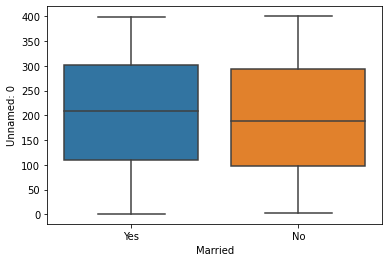

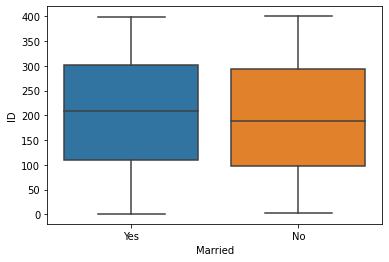

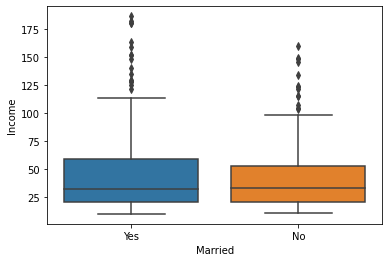

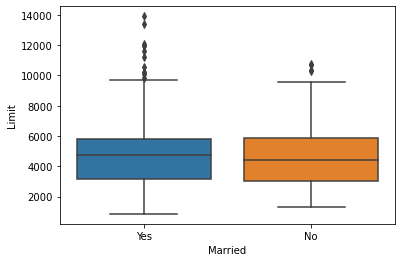

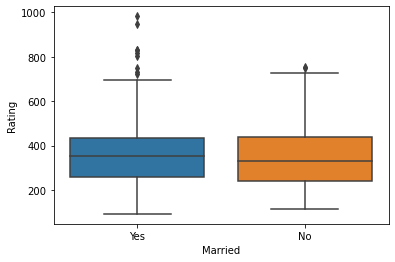

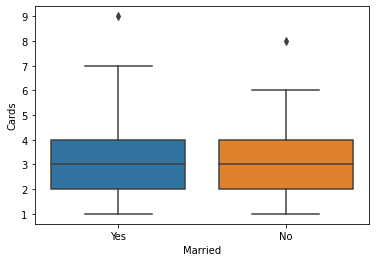

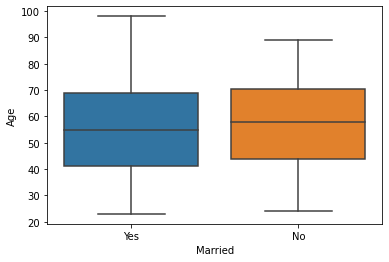

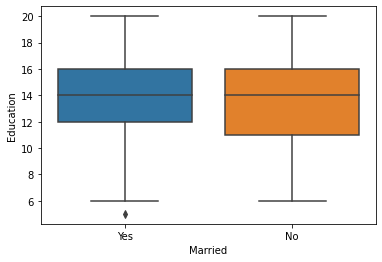

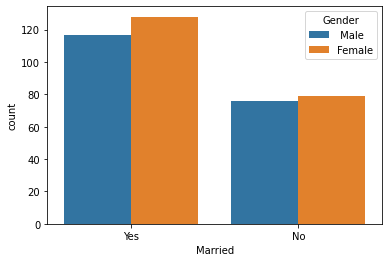

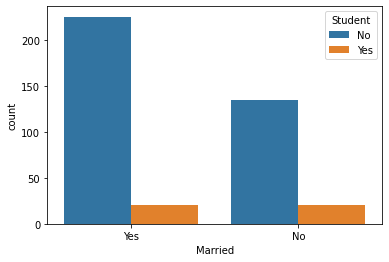

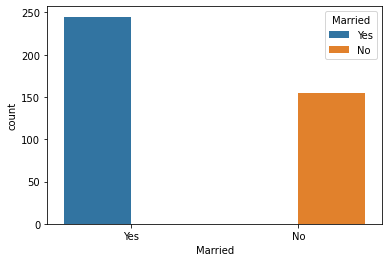

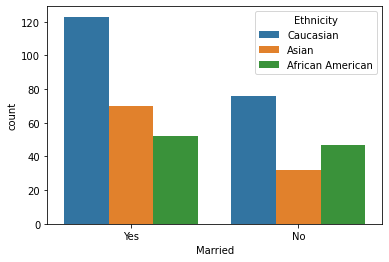

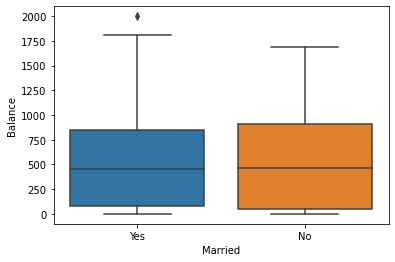

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt

for i in df.columns:
    if(df[i].dtypes == 'object'):
        sb.countplot(df.Married, hue=df[i])
    else:
        sb.boxplot(df.Married, df[i])
    plt.show()

In [6]:
Student1 = pd.get_dummies(df.Student)
Gender1 = pd.get_dummies(df.Gender)
Ethnicity1 = pd.get_dummies(df.Ethnicity)
X1 = Student1.join(Gender1)
X2 = X1.join(Ethnicity1)

In [10]:
X = df.drop(labels=["Unnamed: 0","Married","ID","Gender","Ethnicity","Student"], axis=1).join(X2)
y = df[["Married"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [11]:
X.head(2)

,Income,Limit,Rating,Cards,Age,Education,Balance,No,Yes,Male,Female,African American,Asian,Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,0,0,1
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0


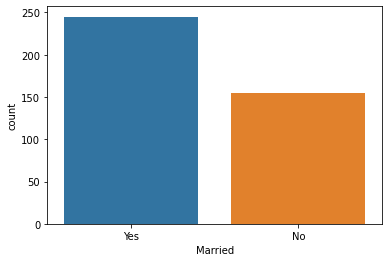

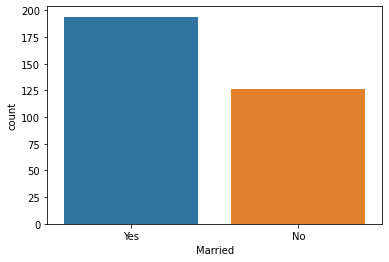

In [12]:
sb.countplot(y.Married)
plt.show()
sb.countplot(y_train.Married)
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sm
for i in range(2, 30, 1):
    rf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=5, min_impurity_decrease=0.009)
    model = rf.fit(X_train, y_train.Married)
    pred = model.predict(X_test)
    print(i, sm.accuracy_score(y_test, pred))

2 0.625
3 0.5625
4 0.6375
5 0.6375
6 0.625
7 0.6375
8 0.6375
9 0.6125
10 0.6125
11 0.6375
12 0.575
13 0.6375
14 0.6375
15 0.5875
16 0.6375
17 0.6375
18 0.6
19 0.6375
20 0.6375
21 0.625
22 0.6125
23 0.6125
24 0.6375
25 0.5875
26 0.575
27 0.65
28 0.6375
29 0.625


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=17, min, random_state=45, max_leaf_nodes=5, min_impurity_decrease=0.009)
model = rf.fit(X_train, y_train.Married)
pred = model.predict(X_test)
print(sm.accuracy_score(y_test, pred))

0.6375


In [58]:
model.feature_importances_

array([0.12589439, 0.24141348, 0.04046462, 0.02742182, 0.24636403,
       0.15177501, 0.        , 0.04143893, 0.        , 0.        ,
       0.        , 0.12522774, 0.        , 0.        ])

In [59]:
X.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'No', 'Yes', ' Male', 'Female', 'African American', 'Asian',
       'Caucasian'],
      dtype='object')

In [60]:
list(zip(X.columns, model.feature_importances_))

[('Income', 0.12589438792254634),
 ('Limit', 0.24141347683201433),
 ('Rating', 0.040464616468742755),
 ('Cards', 0.027421815292402313),
 ('Age', 0.24636402896449916),
 ('Education', 0.15177500785312845),
 ('Balance', 0.0),
 ('No', 0.041438928159835416),
 ('Yes', 0.0),
 (' Male', 0.0),
 ('Female', 0.0),
 ('African American', 0.12522773850683125),
 ('Asian', 0.0),
 ('Caucasian', 0.0)]

<BarContainer object of 14 artists>

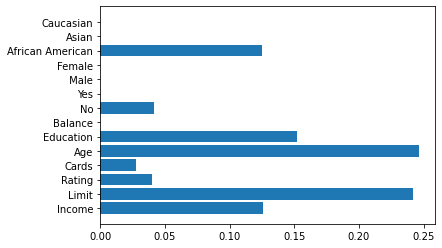

In [61]:
plt.barh(X.columns, model.feature_importances_)

# Regression using Random Forest

In [67]:
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Credit.csv")

In [68]:
Student1 = pd.get_dummies(df.Student)
Gender1 = pd.get_dummies(df.Gender)
Ethnicity1 = pd.get_dummies(df.Ethnicity)
X1 = Student1.join(Gender1)
X2 = X1.join(Ethnicity1)

In [69]:
X = df.drop(labels=["Unnamed: 0","Income","Married","ID","Gender","Ethnicity","Student"], axis=1).join(X2)
y = df[["Income"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   ID          400 non-null    int64  
 2   Income      400 non-null    float64
 3   Limit       400 non-null    int64  
 4   Rating      400 non-null    int64  
 5   Cards       400 non-null    int64  
 6   Age         400 non-null    int64  
 7   Education   400 non-null    int64  
 8   Gender      400 non-null    object 
 9   Student     400 non-null    object 
 10  Married     400 non-null    object 
 11  Ethnicity   400 non-null    object 
 12  Balance     400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


In [74]:
from sklearn.ensemble import RandomForestRegressor
for i in range(2, 30, 1):
    rfr = RandomForestRegressor(n_estimators=20, max_leaf_nodes=5, min_impurity_decrease=0.009)
    model = rfr.fit(X_train, y_train.Income)
    pred = model.predict(X_test)
    print(i, sm.mean_squared_error(y_test, pred))

2 281.3369938621414
3 274.51745987012447
4 279.77386380561467
5 265.3591023981371
6 266.73907897281345
7 282.67589701100223
8 262.1041790529854
9 285.24631659404525
10 281.96380084009525
11 267.71854377361785
12 284.51308048699696
13 275.4852438801454
14 260.93616282288565
15 268.9468380519076
16 271.3875269927951
17 261.01934980537396
18 285.8503257131823
19 285.51488042165323
20 287.9711983561524
21 268.43132899968975
22 267.8489202490141
23 272.2609312555033
24 272.5900735881395
25 280.2442240721462
26 251.9683210832315
27 273.5021231083529
28 289.0527712338862
29 271.4508778405642


<BarContainer object of 13 artists>

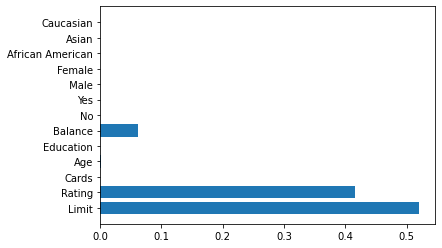

In [75]:
plt.barh(X.columns, model.feature_importances_)